# Final Project
### Group Members: Gege Li, Xiaojia He


### Income data analysis in New York
#### part 1: income in gender

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import geocoder
import folium

In [3]:
#read the csv file
gender = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-5400/master/final/Wage%20by%20Gender%20in%20Common%20Jobs.csv')
#test it
#gender.head()
# to clean and transfer the data, we need to drop the data that we do not need 
gender = gender.drop(columns = ['ID Year','ID Gender', 'Employment Time Status','ID Employment Time Status','ID Detailed Occupation','Average Wage Appx MOE','Total Population MOE Appx', 'Record Count','ID Geography'])
#print the answer
gender.head()

,Gender,Year,Detailed Occupation,Average Wage,Total Population,Geography
0,Male,2017,Retail salespersons,50004.664322,70791,New York
1,Female,2017,Retail salespersons,41425.703378,50084,New York
2,Female,2017,"Nursing, psychiatric, & home health aides",29463.650346,151487,New York
3,Female,2017,Miscellaneous managers,97162.749970,91553,New York
4,Female,2017,Elementary & middle school teachers,69458.339533,187210,New York


In [4]:
gender.groupby(['Year', 'Gender'])['Average Wage'].mean()

Year  Gender
2014  Female    52758.135608
      Male      65888.677753
2015  Female    52637.719147
      Male      64293.934503
2016  Female    54569.377438
      Male      65882.567252
2017  Female    56818.266326
      Male      68020.220297
Name: Average Wage, dtype: float64

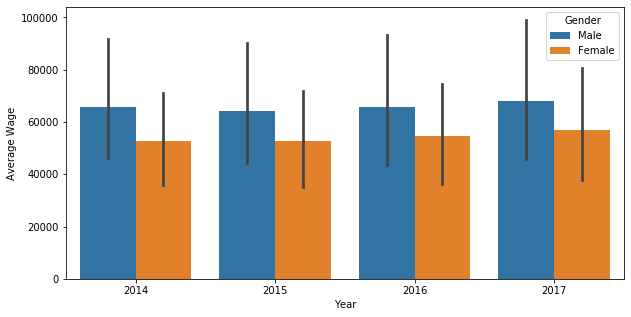

In [5]:
# get the average wage of male and female in differnet year
# Grouping variable that will produce elements with different colors
# add title,xlabel,ylabel to the plot

plt.figure(figsize=(10,5))
sns.barplot(x="Year", y="Average Wage", hue="Gender", data=gender)

#### part 2: income in race

In [6]:
#read the csv file
race = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-5400/master/final/Wage%20by%20Race%20and%20Ethnicity%20in%20Common%20Jobs.csv')
#test it
#race.head()
# to clean and transfer the data, we need to drop the data that we do not need 
race = race.drop(columns = ['ID Year','ID Race', 'Workforce Status','ID Workforce Status','ID Detailed Occupation','Average Wage Appx MOE','Total Population MOE Appx', 'Record Count','ID Geography'])
#print the answer
race.head()

,Race,Year,Detailed Occupation,Average Wage,Total Population,Geography
0,Two or More Races,2017,Retail salespersons,17561.84615,4953,New York
1,Two or More Races,2017,Secretaries & administrative assistants,34295.05522,4962,New York
2,Two or More Races,2017,"Nursing, psychiatric, & home health aides",25519.74846,9923,New York
3,Two or More Races,2017,Miscellaneous managers,110063.70080,4225,New York
4,Two or More Races,2017,Elementary & middle school teachers,79445.16087,4948,New York


In [7]:
race.groupby(['Detailed Occupation'])['Average Wage'].mean()

Detailed Occupation
Elementary & middle school teachers          59882.354607
Miscellaneous managers                       86552.750617
Nursing, psychiatric, & home health aides    23876.516885
Retail salespersons                          25396.394398
Secretaries & administrative assistants      38658.626765
Name: Average Wage, dtype: float64

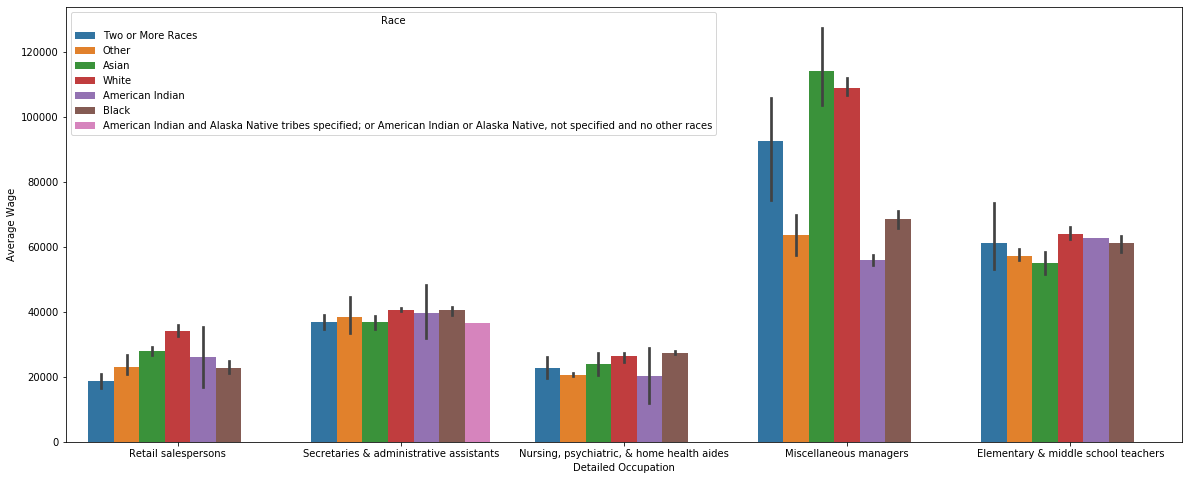

In [8]:
# get the average wage of different race in differnet Occupations
# Grouping variable that will produce elements with different colors
# add title,xlabel,ylabel to the plot
plt.figure(figsize=(20,8))
sns.barplot(x="Detailed Occupation", y="Average Wage", hue="Race", data=race)

#### part 3: income compare New York and the United State

In [9]:
disrtibution = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-5400/master/final/Wage%20Distribution.csv')
disrtibution.head()
# to clean and transfer the data, we need to drop the data that we do not need 
disrtibution = disrtibution.drop(columns = ['ID Year', 'Total Population MOE Appx', 'Slug Geography','Record Count'])
#sorted the data by the wage bin
disrtibution.sort_values('ID Wage Bin', inplace=True)
#print the answer
disrtibution.head()

,ID Wage Bin,Wage Bin,Year,ID Workforce Status,Workforce Status,Total Population,Geography,ID Geography,share
167,1,< $10K,2014,True,True,1096715,New York,04000US36,0.123042
63,1,< $10K,2016,True,True,18071160,United States,01000US,0.124292
65,1,< $10K,2016,True,True,996845,New York,04000US36,0.110766
33,1,< $10K,2017,True,True,948764,New York,04000US36,0.103788
21,1,< $10K,2017,True,True,17420601,United States,01000US,0.117932


Text(0.5, 1.0, 'average salary')

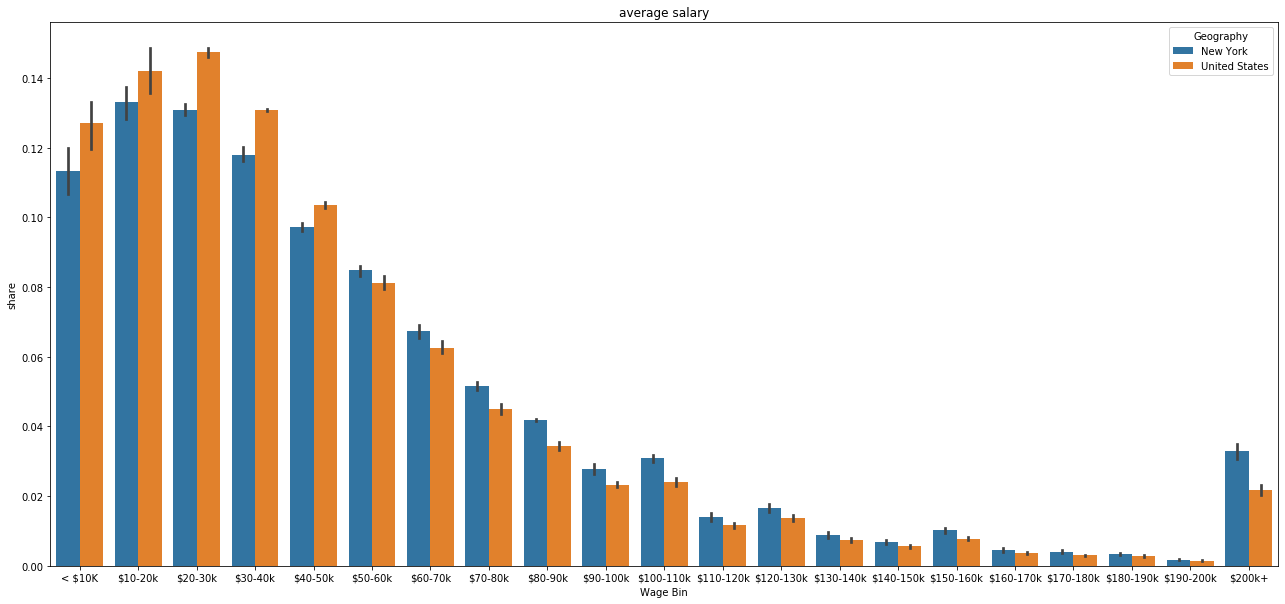

In [10]:
plt.figure(figsize=(22,10))
sns.barplot(x="Wage Bin", y="share", hue="Geography", data=disrtibution).set_title('average salary')

#### part 4: income in different county in New York

In [11]:
income = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-5400/master/final/Median%20Household%20Income.csv')
income.head()

,ID Year,Year,Household Income by Race,Geography,ID Geography,Slug Geography
0,2017,2017,79201,"Richmond County, NY",05000US36085,richmond-county-ny
1,2017,2017,37397,"Bronx County, NY",05000US36005,bronx-county-ny
2,2017,2017,85071,"New York County, NY",05000US36061,new-york-county-ny
3,2017,2017,64509,"Queens County, NY",05000US36081,queens-county-ny
4,2017,2017,56942,"Kings County, NY",05000US36047,kings-county-ny


In [12]:
import geocoder
for i in income['Geography']:
    g = geocoder.arcgis(i)
    print(g.latlng)

[40.58076996900007, -74.15532724299999]
[40.84985000000006, -73.86640999999997]
[40.71455000000003, -74.00713999999994]
[40.71150317400003, -73.81994170099995]
[40.650100000000066, -73.94957999999997]
[40.650100000000066, -73.94957999999997]
[40.58076996900007, -74.15532724299999]
[40.84985000000006, -73.86640999999997]
[40.71455000000003, -74.00713999999994]
[40.71150317400003, -73.81994170099995]
[40.71150317400003, -73.81994170099995]
[40.650100000000066, -73.94957999999997]
[40.84985000000006, -73.86640999999997]
[40.58076996900007, -74.15532724299999]
[40.71455000000003, -74.00713999999994]
[40.650100000000066, -73.94957999999997]
[40.71455000000003, -74.00713999999994]
[40.84985000000006, -73.86640999999997]
[40.71150317400003, -73.81994170099995]
[40.58076996900007, -74.15532724299999]
[40.71150317400003, -73.81994170099995]
[40.58076996900007, -74.15532724299999]
[40.84985000000006, -73.86640999999997]
[40.650100000000066, -73.94957999999997]
[40.71455000000003, -74.00713999999

In [16]:
import folium

folium_map = folium.Map(location=[40.71455000000003, -74.00713999999994],
                        zoom_start=10,
                        tiles="CartoDB dark_matter",
                        width='50%')

# for each row in the data, add a cicle marker
for index, row in income.iterrows():
    g = geocoder.arcgis(row['Geography'])
    

# generate the popup message that is shown on click.
    popup_text = "Year:{} <br> Household Income by Race:{} <br> Place:{}"
    popup_text = popup_text.format(row['Year'],
                                   row["Household Income by Race"],
                                   row["Geography"])

        
# radius of circles
    radius = row["Household Income by Race"] / 10    
    
# choose the color of the marker
    if row["Year"] == 2017:
        color="#E37222" 
    elif row["Year"] == 2016:
        color="#0A8A9F" 
    elif row["Year"] == 2015:
        color="#00FA9A"
    elif row["Year"] == 2014:
        color="#FFF8DC"
    else:
        color="#FF0000" 
        
# add marker to the map
    folium.Circle(location=(g.latlng),
                            radius=radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)      

folium_map

### Expenditure data anaysis in New York
#### Part 1: recent years expenditure trend

In [7]:
#use the web api
url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=economy.consumption.personal_consumption_expenditures&entity_id=0400000US42%2C0400000US36'
#test wether it worked
resp = requests.get(url)
resp

<Response [200]>

In [8]:
#convert data to JSON
data = resp.json()
data

{'data': {'rows': [{'c': [{'v': 1997},
     {'v': 412421, 'f': '$412,421 (Measured)'},
     {'v': True},
     {'v': 248278, 'f': '$248,278 (Measured)'},
     {'v': True}]},
   {'c': [{'v': 1998},
     {'v': 435412, 'f': '$435,412 (Measured)'},
     {'v': True},
     {'v': 261665, 'f': '$261,665 (Measured)'},
     {'v': True}]},
   {'c': [{'v': 1999},
     {'v': 463769, 'f': '$463,769 (Measured)'},
     {'v': True},
     {'v': 277253, 'f': '$277,253 (Measured)'},
     {'v': True}]},
   {'c': [{'v': 2000},
     {'v': 496495, 'f': '$496,495 (Measured)'},
     {'v': True},
     {'v': 296305, 'f': '$296,305 (Measured)'},
     {'v': True}]},
   {'c': [{'v': 2001},
     {'v': 518273, 'f': '$518,273 (Measured)'},
     {'v': True},
     {'v': 309684, 'f': '$309,684 (Measured)'},
     {'v': True}]},
   {'c': [{'v': 2002},
     {'v': 535432, 'f': '$535,432 (Measured)'},
     {'v': True},
     {'v': 320981, 'f': '$320,981 (Measured)'},
     {'v': True}]},
   {'c': [{'v': 2003},
     {'v': 562955, 

In [9]:
# Extracted the content started from result
results = data['data']
results
a = results['rows']
a

[{'c': [{'v': 1997},
   {'v': 412421, 'f': '$412,421 (Measured)'},
   {'v': True},
   {'v': 248278, 'f': '$248,278 (Measured)'},
   {'v': True}]},
 {'c': [{'v': 1998},
   {'v': 435412, 'f': '$435,412 (Measured)'},
   {'v': True},
   {'v': 261665, 'f': '$261,665 (Measured)'},
   {'v': True}]},
 {'c': [{'v': 1999},
   {'v': 463769, 'f': '$463,769 (Measured)'},
   {'v': True},
   {'v': 277253, 'f': '$277,253 (Measured)'},
   {'v': True}]},
 {'c': [{'v': 2000},
   {'v': 496495, 'f': '$496,495 (Measured)'},
   {'v': True},
   {'v': 296305, 'f': '$296,305 (Measured)'},
   {'v': True}]},
 {'c': [{'v': 2001},
   {'v': 518273, 'f': '$518,273 (Measured)'},
   {'v': True},
   {'v': 309684, 'f': '$309,684 (Measured)'},
   {'v': True}]},
 {'c': [{'v': 2002},
   {'v': 535432, 'f': '$535,432 (Measured)'},
   {'v': True},
   {'v': 320981, 'f': '$320,981 (Measured)'},
   {'v': True}]},
 {'c': [{'v': 2003},
   {'v': 562955, 'f': '$562,955 (Measured)'},
   {'v': True},
   {'v': 339358, 'f': '$339,358 (Me

In [10]:
#select the column: 'year','New York expenditure','Pennsylvania expenditure'

#create new lists
year = []
NY = []
Penn = []
#use a for loop to expand the list
for c in range(len(a)):
    cc = a[c]['c']
    #print(cc) 
    year.append(cc[0]['v'])
    NY.append(cc[1]['v'])
    Penn.append(cc[3]['v'])
    
dict = {'year':year , 'NY':NY , 'Penn':Penn}
Top = pd.DataFrame(dict, columns=['year','NY','Penn'])
Top

,year,NY,Penn
0,1997,412421.000000,248278.000000
1,1998,435412.000000,261665.000000
2,1999,463769.000000,277253.000000
3,2000,496495.000000,296305.000000
4,2001,518273.000000,309684.000000
5,2002,535432.000000,320981.000000
6,2003,562955.000000,339358.000000
7,2004,595605.000000,357580.000000
8,2005,632211.000000,376511.000000
9,2006,664060.000000,394583.000000


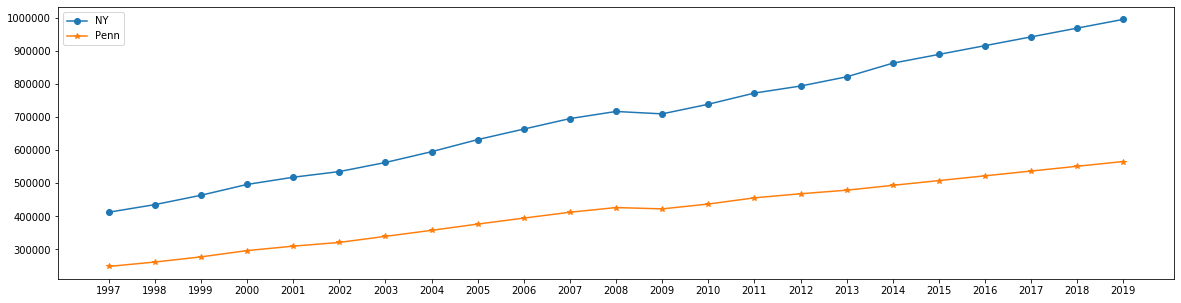

In [11]:
plt.figure(figsize=(20,5))
plt.plot(Top['year'],Top['NY'],marker='o',label=u'NY')
plt.plot(Top['year'],Top['Penn'],marker='*',label=u'Penn')
plt.legend()
x = range(1997,2020,1)
plt.xticks(x,x)
plt.show()

#### Part 2: three most important expenses(housing, transportation, food) comparison

In [24]:
#open the web page containing the html data
tables = pd.read_html('https://raw.githubusercontent.com/gegeli638/DAV-5400/master/final/html.html')
#the first item in the list is a data frame
html = tables[0]
html.head()

,Area,Housing,Transportation,Food
0,United States,33.0,16.0,12.9
1,Anchorage,31.5,15.7,12.6
2,Atlanta,32.8,16.3,11.5
3,Baltimore,32.3,15.8,11.9
4,Boston,37.5,12.0,12.1


In [25]:
# convert the values of Housing,Transportation and Food columns to int
html['Housing'] = pd.to_numeric(html['Housing'])
html['Transportation'] = pd.to_numeric(html['Transportation'])
html['Food'] = pd.to_numeric(html['Food'])
#html.head()
# get the total expenses of Housing,Transportation,Food
html['Total'] = html.sum(axis=1)
html.head()

,Area,Housing,Transportation,Food,Total
0,United States,33.0,16.0,12.9,61.9
1,Anchorage,31.5,15.7,12.6,59.8
2,Atlanta,32.8,16.3,11.5,60.6
3,Baltimore,32.3,15.8,11.9,60.0
4,Boston,37.5,12.0,12.1,61.6


In [26]:
html1 = html.melt(id_vars = ["Area"], value_vars = ['Housing','Transportation','Food','Total'])
html.head()

,Area,Housing,Transportation,Food,Total
0,United States,33.0,16.0,12.9,61.9
1,Anchorage,31.5,15.7,12.6,59.8
2,Atlanta,32.8,16.3,11.5,60.6
3,Baltimore,32.3,15.8,11.9,60.0
4,Boston,37.5,12.0,12.1,61.6


In [28]:
expenditure = html1[(html1.Area == 'United States')|(html1.Area == 'New York')|(html1.Area == 'Washington, D.C.')]
expenditure

,Area,variable,value
0,United States,Housing,33.0
14,New York,Housing,39.0
22,"Washington, D.C.",Housing,33.9
23,United States,Transportation,16.0
37,New York,Transportation,12.0
45,"Washington, D.C.",Transportation,14.4
46,United States,Food,12.9
60,New York,Food,12.3
68,"Washington, D.C.",Food,12.3
69,United States,Total,61.9


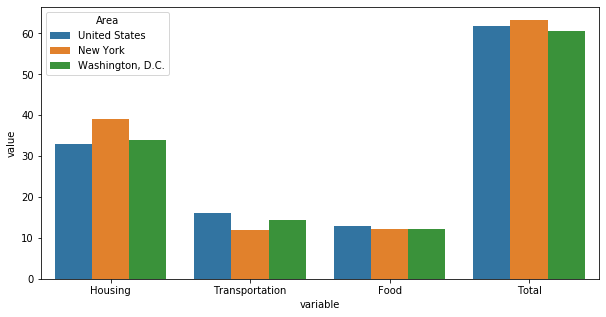

In [29]:
plt.figure(figsize=(10,5))

sns.barplot(x='variable',y='value',hue="Area",data=expenditure)

### Conclusion